In [2]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint

In [3]:
# Import keys for Covid19Api webpage
from DS6_config import DS601key

In [4]:
# Create empty lists, country and dates
froms = []
tos = []
confirmed = []
deaths = []
country = []
country = 'mexico'
fromdate = '2020-01-01'
todate = '2021-03-01'

# Assemble URL with the informtion needed.
confirmed_url = f'https://api.covid19api.com/total/country/{country}/status/confirmed?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
deaths_url = f'https://api.covid19api.com/total/country/{country}/status/deaths?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
response_deaths = requests.get(deaths_url).json() 
response_confirmed = requests.get(confirmed_url).json()

In [5]:
# Generate empty lists for deaths and covid confirmed.
day_cumulated_deaths=[]
day_cumulated_confirmed=[]
country_data=[]
date_data = []

# Fill information for every row read on the url response, for deaths and confirmed cases.
for day in response_deaths:
     day_cumulated_deaths.append(day['Cases'])
for day in response_confirmed:
    day_cumulated_confirmed.append(day['Cases'])
    country_data.append(country)
    date_data.append(day['Date'][0:10])

In [6]:
# Assemble dictionary with columns names and lists.
dict_cases = {'date': date_data, 'country': country_data, 'confirmed': day_cumulated_confirmed, 'deaths': day_cumulated_deaths}  

# Generate a DataFrame.
dfmexico = pd.DataFrame(dict_cases) 
dfmexico  

,date,country,confirmed,deaths
0,2020-01-22,mexico,0,0
1,2020-01-23,mexico,0,0
2,2020-01-24,mexico,0,0
3,2020-01-25,mexico,0,0
4,2020-01-26,mexico,0,0
...,...,...,...,...
387,2021-02-12,mexico,1978954,172557
388,2021-02-13,mexico,1988695,173771
389,2021-02-14,mexico,1992794,174207
390,2021-02-15,mexico,1995892,174657


In [7]:
# export to excel
dfmexico.to_excel("mexico.xlsx")

In [8]:
# Do the same for 'united states of america'

In [9]:
froms = []
tos = []
confirmed = []
deaths = []
country = []
country = 'united states of america'
fromdate = '2020-01-01'
todate = '2021-03-01'
confirmed_url = f'https://api.covid19api.com/total/country/{country}/status/confirmed?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
deaths_url = f'https://api.covid19api.com/total/country/{country}/status/deaths?from={fromdate}T00:00:00Z&to={todate}T00:00:00Z'
response_deaths = requests.get(deaths_url).json() 
response_confirmed = requests.get(confirmed_url).json()
country

'united states of america'

In [10]:
day_cumulated_deaths=[]
day_cumulated_confirmed=[]
country_data=[]
date_data = []
for day in response_deaths:
     day_cumulated_deaths.append(day['Cases'])
for day in response_confirmed:
    day_cumulated_confirmed.append(day['Cases'])
    country_data.append(country)
    date_data.append(day['Date'][0:10])

In [11]:
dict_cases = {'date': date_data, 'country': country_data, 'confirmed': day_cumulated_confirmed, 'deaths': day_cumulated_deaths}  
    
dfusa = pd.DataFrame(dict_cases) 
dfusa

,date,country,confirmed,deaths
0,2020-01-22,united states of america,1,0
1,2020-01-23,united states of america,1,0
2,2020-01-24,united states of america,2,0
3,2020-01-25,united states of america,2,0
4,2020-01-26,united states of america,5,0
...,...,...,...,...
387,2021-02-12,united states of america,27492023,482142
388,2021-02-13,united states of america,27575344,484301
389,2021-02-14,united states of america,27640282,485384
390,2021-02-15,united states of america,27694226,486325


In [15]:
dfusa.to_excel("usa.xlsx")
print(dfusa)

           date                   country  confirmed  deaths
0    2020-01-22  united states of america          1       0
1    2020-01-23  united states of america          1       0
2    2020-01-24  united states of america          2       0
3    2020-01-25  united states of america          2       0
4    2020-01-26  united states of america          5       0
..          ...                       ...        ...     ...
387  2021-02-12  united states of america   27492023  482142
388  2021-02-13  united states of america   27575344  484301
389  2021-02-14  united states of america   27640282  485384
390  2021-02-15  united states of america   27694226  486325
391  2021-02-16  united states of america   27756624  488081

[392 rows x 4 columns]


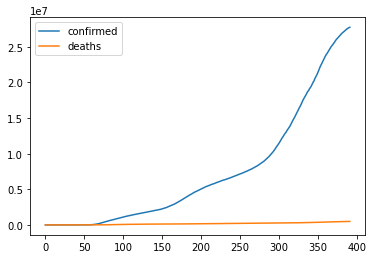

In [18]:
df = pd.DataFrame({
   'confirmed': dfusa['confirmed'],
   'deaths': dfusa['deaths']
   })
lines = df.plot.line()

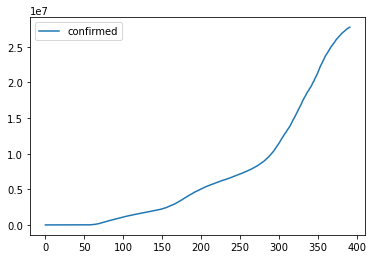

In [19]:
df = pd.DataFrame({
   'confirmed': dfusa['confirmed']
   })
lines = df.plot.line()

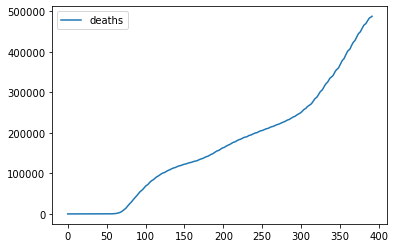

In [20]:
df = pd.DataFrame({
   'deaths': dfusa['deaths']
   })
lines = df.plot.line()

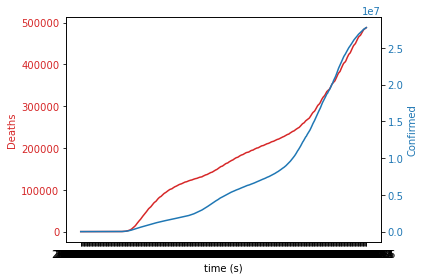

In [24]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Deaths', color=color)
ax1.plot(dfusa['date'],dfusa['deaths'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Confirmed', color=color)  # we already handled the x-label with ax1
ax2.plot(dfusa['date'], dfusa['confirmed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()